**The objective of this notebook is to create a machine learning model using the ARIMA algorithm to make predictions of the behavior of the MGLU3 stock on the stock exchange.**

## **Magazine Luiza Company**

### **Importting library and dataset**

In [5]:
# Installing yfinance library
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=4f31f03220f83b3be6d93981b1187a36acfd9a7336397104c3f859044f2c0e65
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [68]:
# Importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [19]:
# Using yfinance to obtain Magazine Luiza's stock information
ticket = yf.Ticker("MGLU3.SA")

# Creating our DataFrame with information from the last 3 years and 1 day intervals
df = ticket.history(interval="1d", period="3y")
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-19,2.739629,2.772818,2.704327,2.736612,31827200,0.0,0.0
2018-03-20,2.760750,2.779758,2.712474,2.715492,28355200,0.0,0.0


In [20]:
# Transforming our DataFrame with only "Close" column
df = df[["Close"]]
df.head(2)

,Close
Date,
2018-03-19,2.736612
2018-03-20,2.715492


In [162]:
# Checking our dataset
df.describe()

,Close
count,737.000000
mean,11.215662
std,7.607537
min,2.715492
25%,5.048289
50%,8.837445
75%,16.682821
max,27.421442


In [54]:
# Checking dtypes of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737 entries, 2018-03-19 to 2021-03-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   737 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


### **Analyzing the data to create the model**

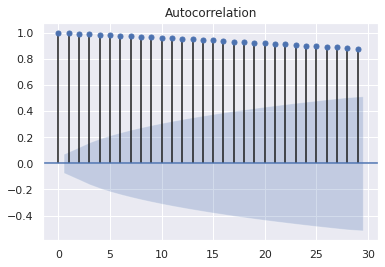

In [74]:
# Looking for autocorrelation to decide our AR number
plot_acf(df["Close"])
plt.show()

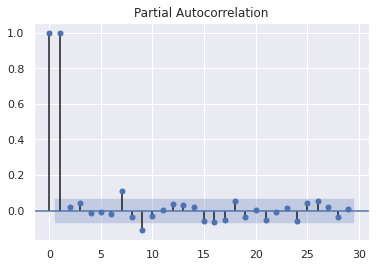

In [75]:
# # Looking for partial autocorrelation to decide our AR number in the model
plot_pacf(df["Close"])
plt.show()

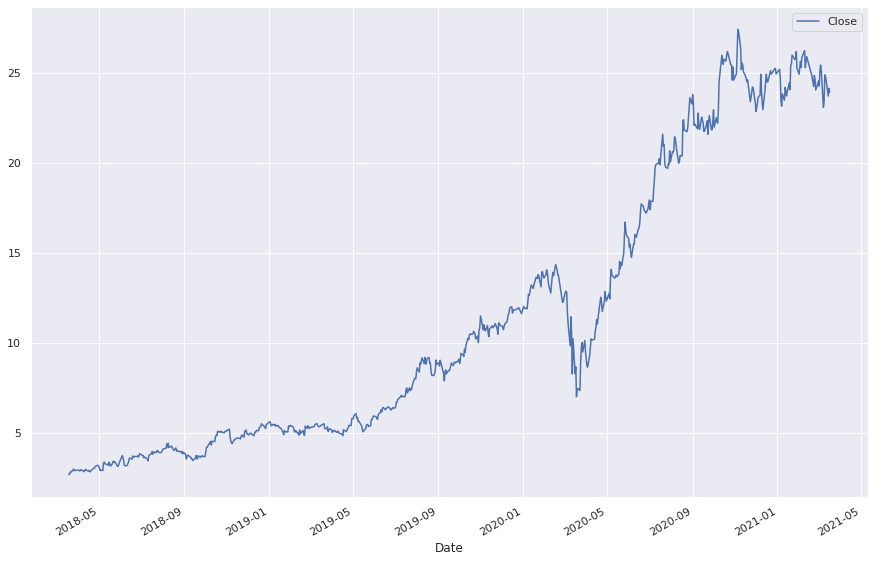

In [24]:
# Defining our graphic style
sns.set()

# Plotting the change in stock over the past 3 years
df.plot(figsize=(15, 10))

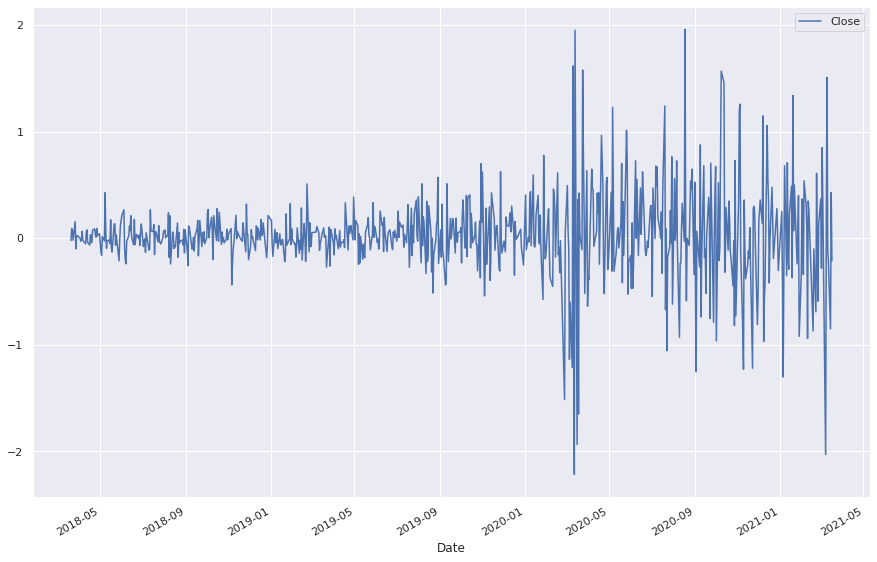

In [31]:
# Transforming our graphic to be stationary
df.diff().plot(figsize=(15,10))

### **Creating our model with all data set**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


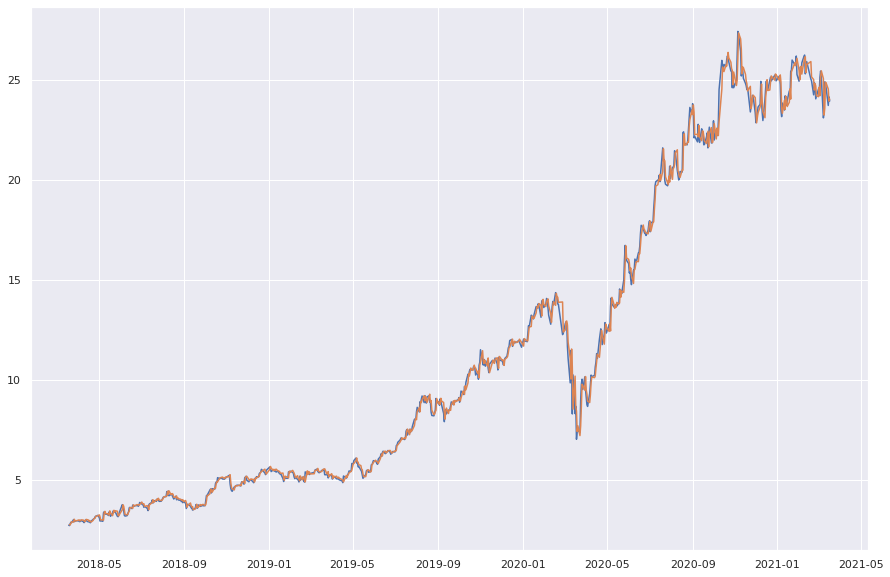

In [145]:
# Creating our model
arima = ARIMA(df["Close"], order=(7, 1, 2)).fit()

# Predicting using our model
arima_predict = arima.predict(typ="levels")

# Plotting a comparison between the real data and our model predicts
plt.figure(figsize=(15, 10))
plt.plot(df["Close"])
plt.plot(arima_predict)




In [195]:
# Checking Mean Square Error of our model predictions
mse = (arima.resid ** 2).mean()
mse

0.15664888292425183

In [196]:
# Checking Mean Absolut Error of our model predictions
mae = mse ** 0.5
mae

0.39578893734445364

In [147]:
# Looking for the last prediction of our model
arima_predict[-1]

24.035226132809093

In [198]:
# Checking the possible values ​​for our forecast using ARIMA
possible_forecast_values = [arima.forecast()[0] + absolut_mae, 
                   arima.forecast()[0] - absolut_mae]
possible_forecast_values

[array([24.31136587]), array([23.519788])]

### **Creating our model with train and test set**

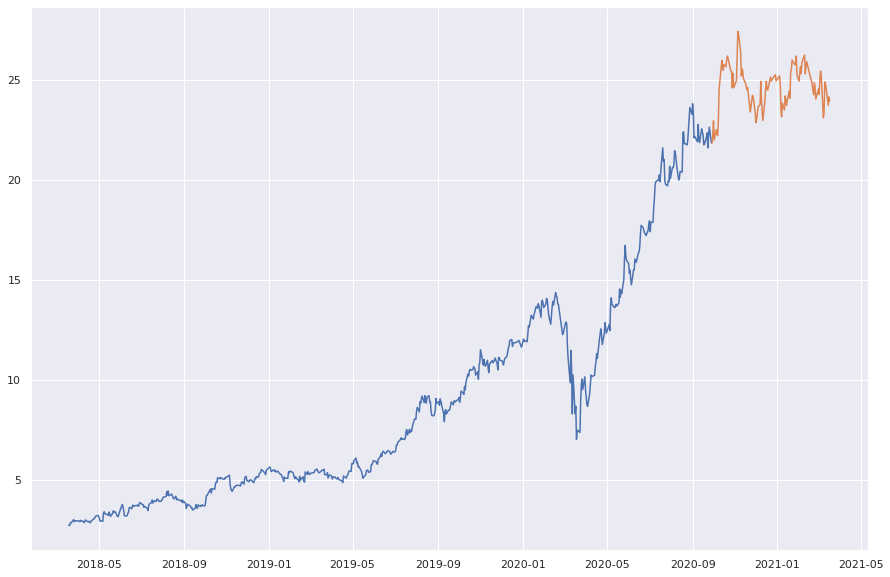

In [149]:
# Separating the data between train and test
train_size = int(len(df["Close"]) * 0.85)
train_set = df["Close"][:train_size]
test_set = df["Close"][train_size:]

# Plotting data division
plt.figure(figsize=(15, 10))
plt.plot(train_set)
plt.plot(test_set)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

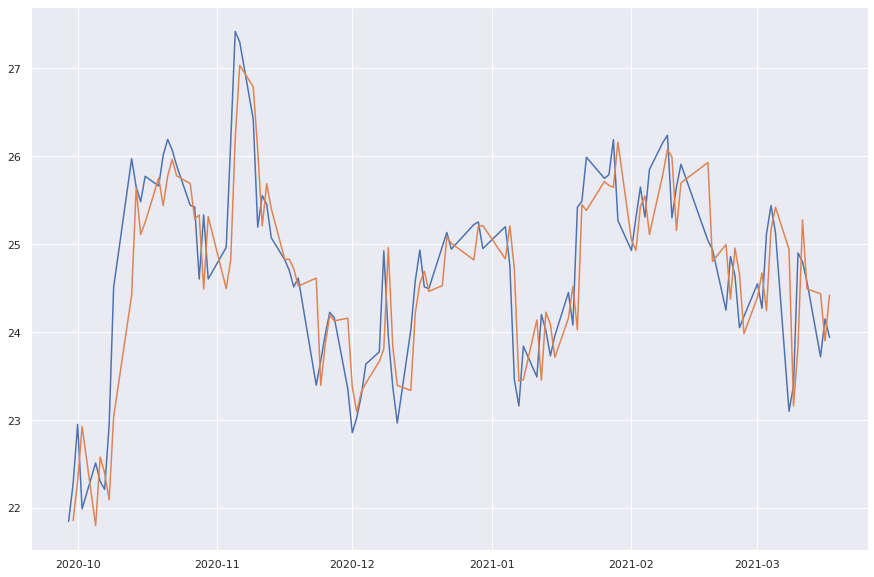

In [164]:
# Creating our model using our train set
arima_train = ARIMA(train_set, order=(7, 1, 2)).fit()
arima_2 = ARIMA(test_set, order=(7, 1, 2)).fit(arima_train.params)

# Predicting the test set using our new model
arima_2.predict(typ="levels")

# Plotting a comparison between the real test set and our model predicts
plt.figure(figsize=(15, 10))
plt.plot(test_set)
plt.plot(arima_2.predict(typ="levels"))

In [179]:
# Checking Mean Square Error of our model predictions for test set
mse = (arima_2.resid ** 2).mean()
mse

0.3554381874898139

In [181]:
# Checking Mean Absolut Error of our model predictions for test set
mae = mse ** 0.5
mae

0.5961863697618505

In [194]:
# # Checking the possible values ​​for our forecast using ARIMA
possible_values = [arima_2.forecast()[0] + absolut_mae, 
                   arima_2.forecast()[0] - absolut_mae]  
possible_values

[array([24.68508316]), array([23.49271042])]